In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

matches_df = pd.read_csv('matches.csv')


print(matches_df.head())


       id   season        city        date match_type player_of_match  \
0  335982  2007/08   Bangalore  2008-04-18     League     BB McCullum   
1  335983  2007/08  Chandigarh  2008-04-19     League      MEK Hussey   
2  335984  2007/08       Delhi  2008-04-19     League     MF Maharoof   
3  335985  2007/08      Mumbai  2008-04-20     League      MV Boucher   
4  335986  2007/08     Kolkata  2008-04-20     League       DJ Hussey   

                                        venue                        team1  \
0                       M Chinnaswamy Stadium  Royal Challengers Bangalore   
1  Punjab Cricket Association Stadium, Mohali              Kings XI Punjab   
2                            Feroz Shah Kotla             Delhi Daredevils   
3                            Wankhede Stadium               Mumbai Indians   
4                                Eden Gardens        Kolkata Knight Riders   

                         team2                  toss_winner toss_decision  \
0        Kolkat

In [7]:
print(matches_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

In [8]:
print(matches_df.describe())

                 id  result_margin  target_runs  target_overs
count  1.095000e+03    1076.000000  1092.000000   1092.000000
mean   9.048283e+05      17.259294   165.684066     19.759341
std    3.677402e+05      21.787444    33.427048      1.581108
min    3.359820e+05       1.000000    43.000000      5.000000
25%    5.483315e+05       6.000000   146.000000     20.000000
50%    9.809610e+05       8.000000   166.000000     20.000000
75%    1.254062e+06      20.000000   187.000000     20.000000
max    1.426312e+06     146.000000   288.000000     20.000000


In [9]:
print(matches_df.isnull().sum())

id                    0
season                0
city                 51
date                  0
match_type            0
player_of_match       5
venue                 0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
winner                5
result                0
result_margin        19
target_runs           3
target_overs          3
super_over            0
method             1074
umpire1               0
umpire2               0
dtype: int64


In [11]:
print(matches_df.duplicated().sum())

0


In [12]:
wins_per_team = matches_df['winner'].value_counts()
print("\nWins per Team:")
print(wins_per_team)


Wins per Team:
winner
Mumbai Indians                 144
Chennai Super Kings            138
Kolkata Knight Riders          131
Royal Challengers Bangalore    116
Rajasthan Royals               112
Kings XI Punjab                 88
Sunrisers Hyderabad             88
Delhi Daredevils                67
Delhi Capitals                  48
Deccan Chargers                 29
Gujarat Titans                  28
Lucknow Super Giants            24
Punjab Kings                    24
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Royal Challengers Bengaluru      7
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: count, dtype: int64


Text(0.5, 0, 'Team')

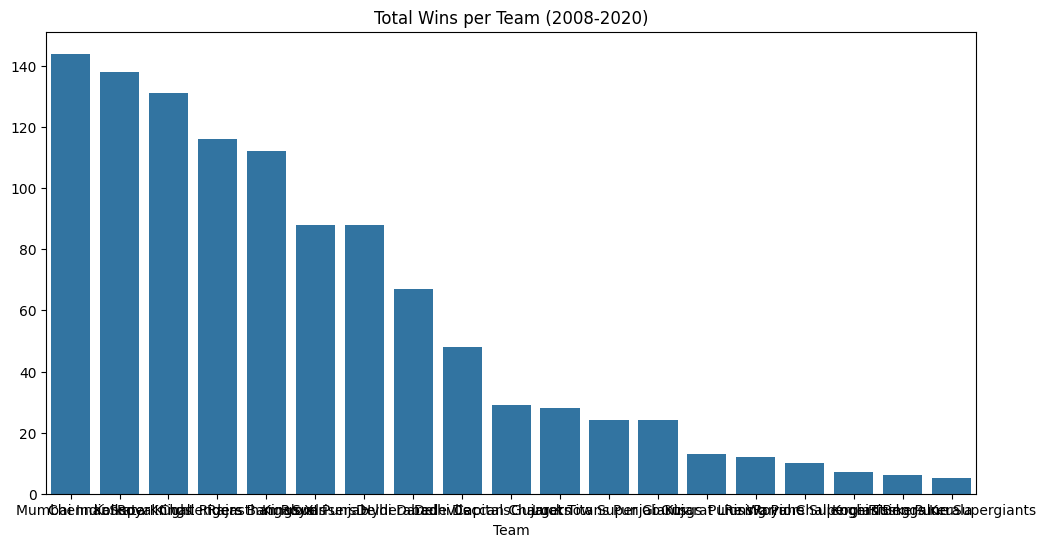

In [13]:
plt.figure(figsize=(12, 6))
sns.barplot(x=wins_per_team.index, y=wins_per_team.values)
plt.title('Total Wins per Team (2008-2020)')
plt.xlabel('Team')

In [14]:
top_players = matches_df['player_of_match'].value_counts().head(10)
print("\nTop 10 Players of the Match:")
print(top_players)


Top 10 Players of the Match:
player_of_match
AB de Villiers    25
CH Gayle          22
RG Sharma         19
DA Warner         18
V Kohli           18
MS Dhoni          17
SR Watson         16
YK Pathan         16
RA Jadeja         16
AD Russell        15
Name: count, dtype: int64


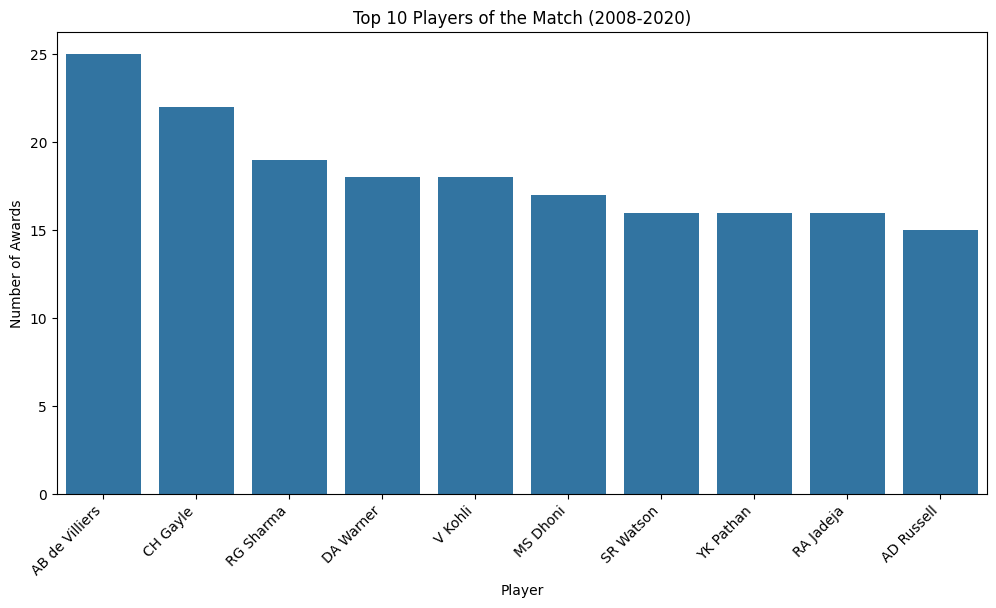

In [15]:
plt.figure(figsize=(12, 6))
sns.barplot(x=top_players.index, y=top_players.values)
plt.title('Top 10 Players of the Match (2008-2020)')
plt.xlabel('Player')
plt.ylabel('Number of Awards')
plt.xticks(rotation=45, ha='right')
plt.show()

In [16]:
awards_per_season = matches_df.groupby('season')['player_of_match'].value_counts().groupby(level=0).head(1)  # Get top player for each season
print("\nPlayer of the Match Awards per Season:")
print(awards_per_season)


Player of the Match Awards per Season:
season   player_of_match
2007/08  SE Marsh           5
2009     YK Pathan          3
2009/10  SR Tendulkar       4
2011     CH Gayle           6
2012     CH Gayle           5
2013     MEK Hussey         5
2014     GJ Maxwell         4
2015     DA Warner          4
2016     V Kohli            5
2017     BA Stokes          3
2018     Rashid Khan        4
2019     AD Russell         4
2020/21  AB de Villiers     3
2021     RD Gaikwad         4
2022     Kuldeep Yadav      4
2023     Shubman Gill       4
2024     Abhishek Sharma    3
Name: count, dtype: int64


In [17]:
awards_by_team = matches_df.groupby('winner')['player_of_match'].value_counts().groupby(level=0).head(1) # Get top player for winning team
print("\nTop Player of the Match for Each Winning Team:")
print(awards_by_team)


Top Player of the Match for Each Winning Team:
winner                       player_of_match
Chennai Super Kings          RA Jadeja          16
Deccan Chargers              AC Gilchrist        4
Delhi Capitals               Kuldeep Yadav       6
Delhi Daredevils             V Sehwag           10
Gujarat Lions                AJ Finch            3
Gujarat Titans               Shubman Gill        7
Kings XI Punjab              SE Marsh            9
Kochi Tuskers Kerala         BB McCullum         2
Kolkata Knight Riders        AD Russell         15
Lucknow Super Giants         MP Stoinis          5
Mumbai Indians               RG Sharma          16
Pune Warriors                SPD Smith           2
Punjab Kings                 Harpreet Brar       3
Rajasthan Royals             JC Buttler         12
Rising Pune Supergiant       BA Stokes           3
Rising Pune Supergiants      AB Dinda            2
Royal Challengers Bangalore  AB de Villiers     23
Royal Challengers Bengaluru  V Kohli    

In [19]:
wins_per_season = matches_df.groupby(['season', 'winner'])['id'].count().reset_index(name='wins')
print("\nWins per Team per Season:")
print(wins_per_season)



Wins per Team per Season:
      season                       winner  wins
0    2007/08          Chennai Super Kings     9
1    2007/08              Deccan Chargers     2
2    2007/08             Delhi Daredevils     7
3    2007/08              Kings XI Punjab    10
4    2007/08        Kolkata Knight Riders     6
..       ...                          ...   ...
141     2024               Mumbai Indians     4
142     2024                 Punjab Kings     5
143     2024             Rajasthan Royals     9
144     2024  Royal Challengers Bengaluru     7
145     2024          Sunrisers Hyderabad     9

[146 rows x 3 columns]


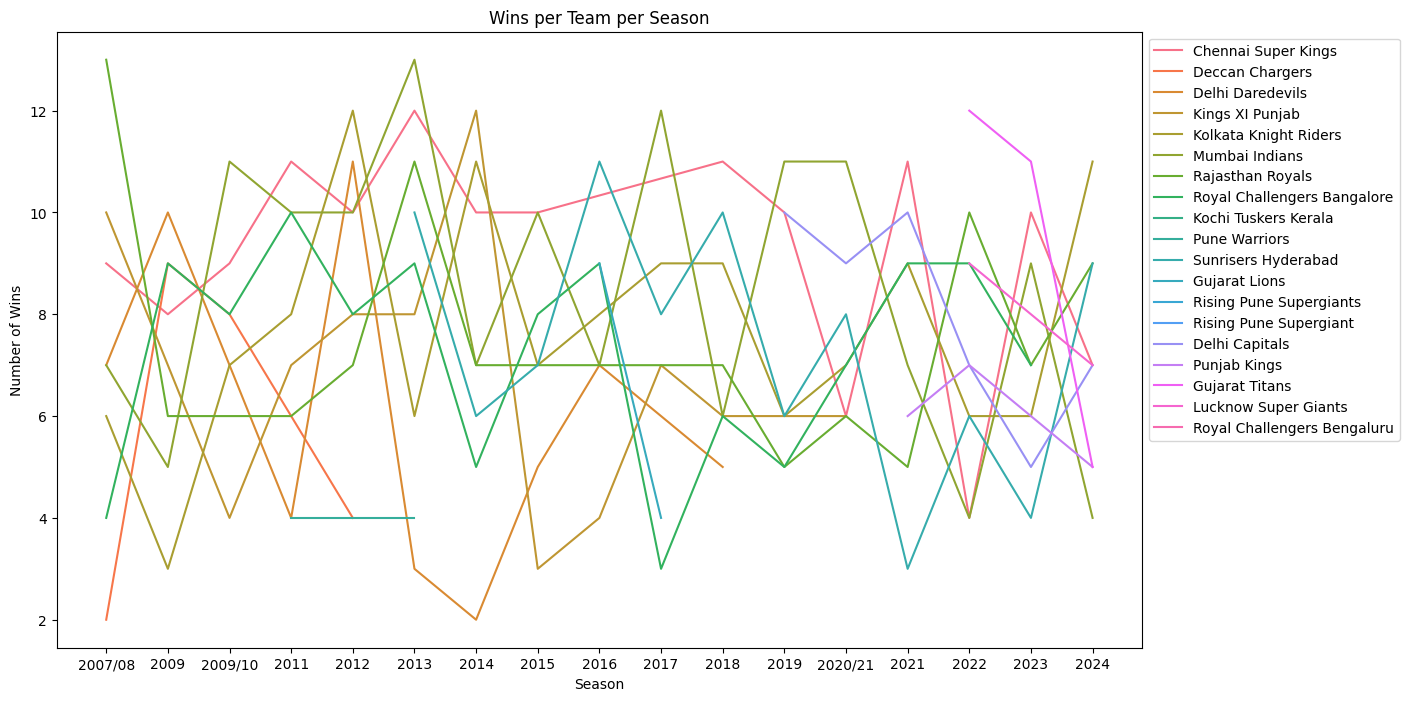

In [20]:
plt.figure(figsize=(14, 8))
sns.lineplot(x='season', y='wins', hue='winner', data=wins_per_season)
plt.title('Wins per Team per Season')
plt.xlabel('Season')
plt.ylabel('Number of Wins')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Place legend outside the plot
plt.show()

In [10]:
total_matches_per_season = matches_df.groupby(['season', 'team1'])['id'].count().reset_index(name='total_matches')
total_matches_per_season = total_matches_per_season.merge(matches_df.groupby(['season', 'team1'])['id'].count().reset_index(name='total_matches'), on=['season', 'team1'], how='outer')
total_matches_per_season['total_matches'] = total_matches_per_season['total_matches_x'] + total_matches_per_season['total_matches_y']
total_matches_per_season = total_matches_per_season[['season', 'team1', 'total_matches']].rename(columns={'team1': 'team'})

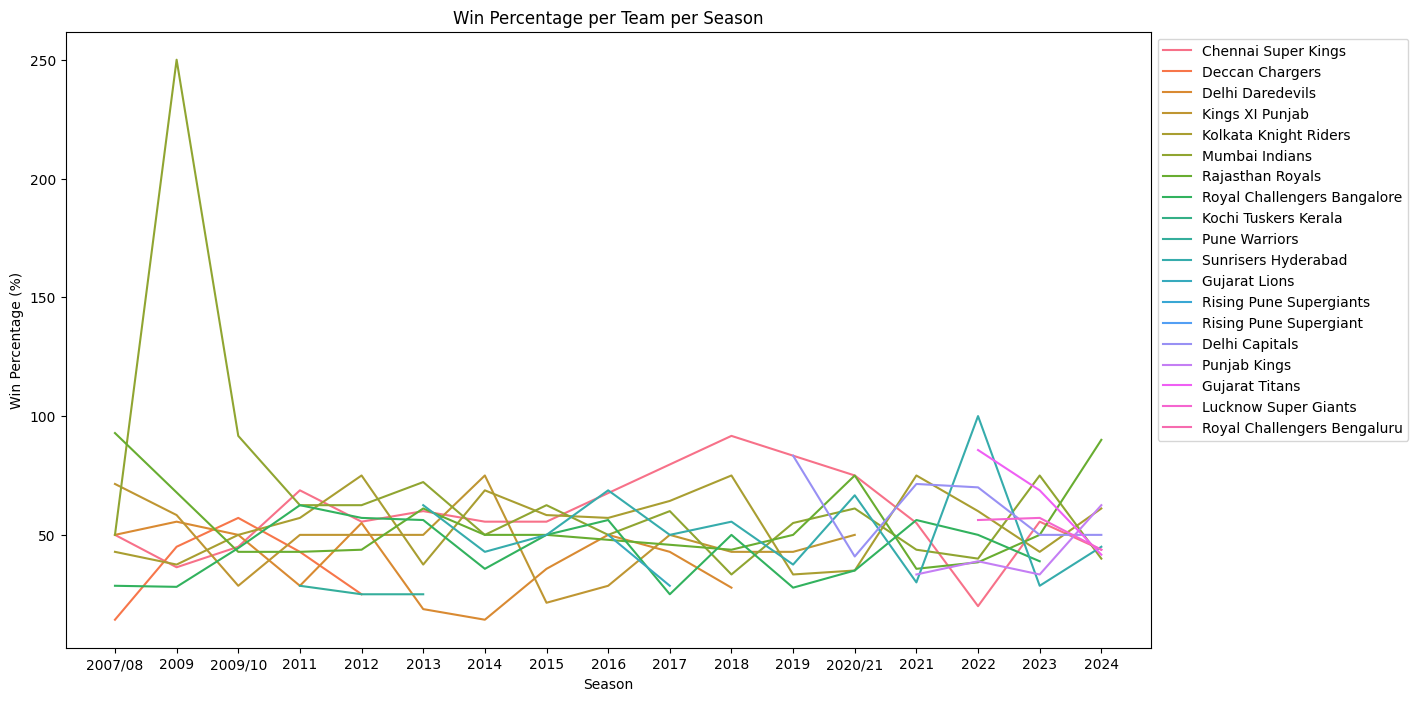

In [25]:
plt.figure(figsize=(14, 8))
sns.lineplot(x='season', y='win_percentage', hue='winner', data=win_percentage_per_season)
plt.title('Win Percentage per Team per Season')
plt.xlabel('Season')
plt.ylabel('Win Percentage (%)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Place legend outside the plot
plt.show()

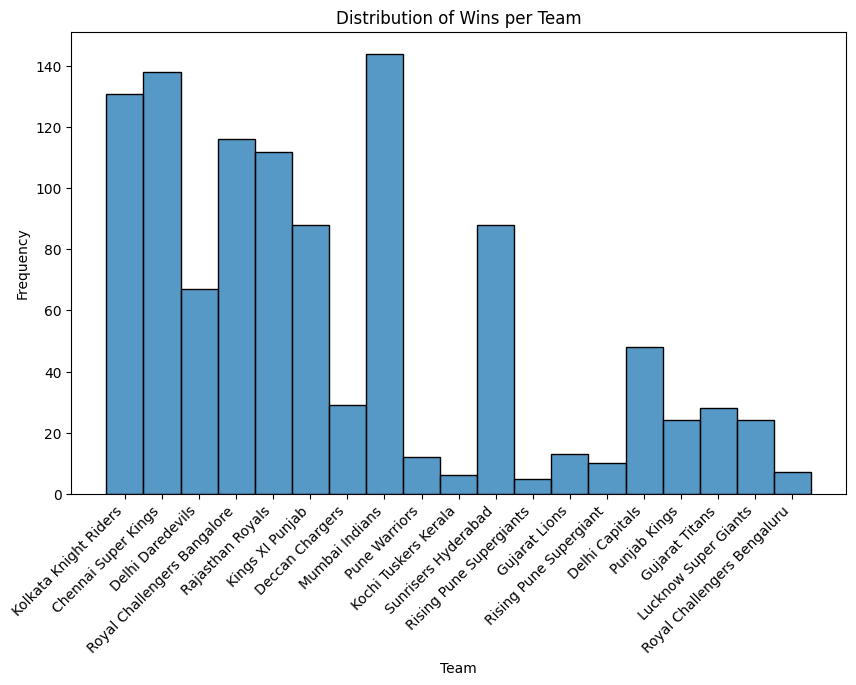

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(matches_df['winner'])
plt.title('Distribution of Wins per Team')
plt.xlabel('Team')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()


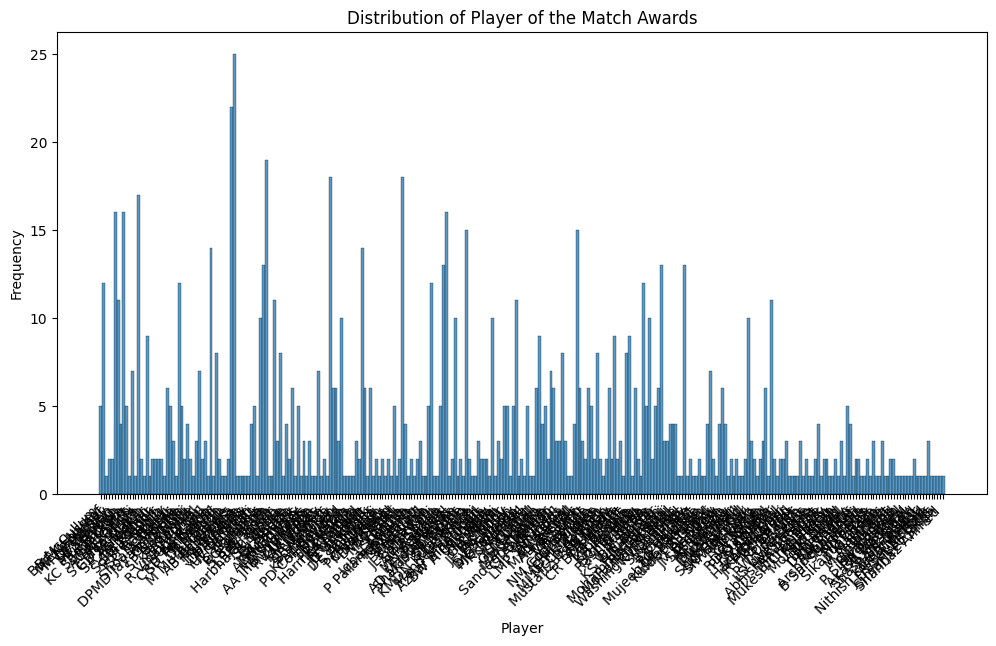

In [13]:
# Histogram of player of the match awards
plt.figure(figsize=(12, 6))
sns.histplot(matches_df['player_of_match'])
plt.title('Distribution of Player of the Match Awards')
plt.xlabel('Player')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

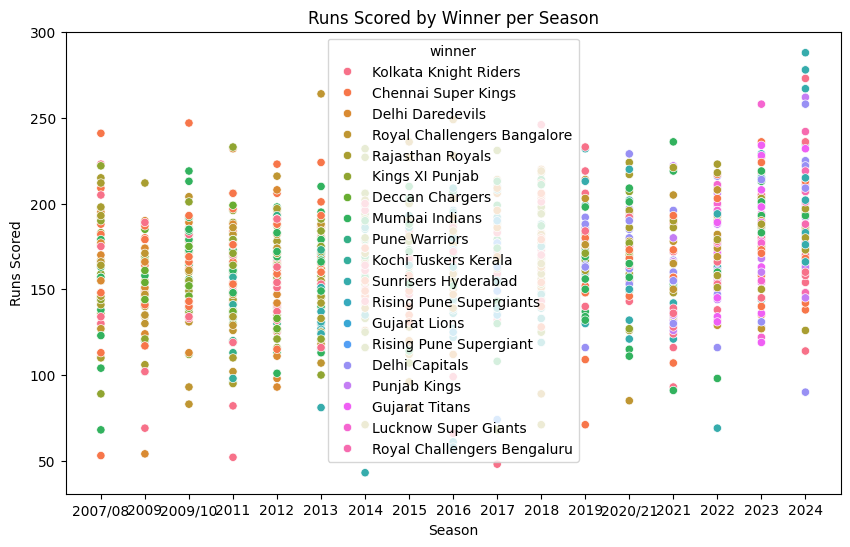

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='season', y='target_runs', data=matches_df, hue='winner')
plt.title('Runs Scored by Winner per Season')
plt.xlabel('Season')
plt.ylabel('Runs Scored')
plt.show()

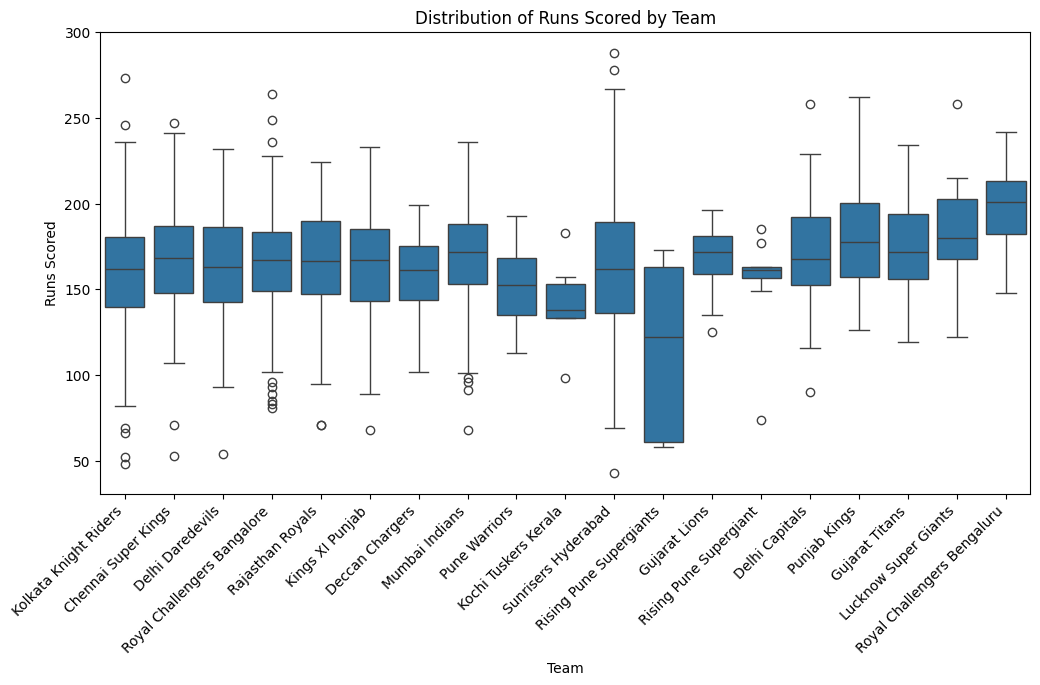

In [20]:
# Box plot of runs scored by team
plt.figure(figsize=(12, 6))
sns.boxplot(x='winner', y='target_runs', data=matches_df)
plt.title('Distribution of Runs Scored by Team')
plt.xlabel('Team')
plt.ylabel('Runs Scored')
plt.xticks(rotation=45, ha='right')
plt.show()